task 1

In [6]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

print(iris.head())

print(iris.tail())

print(iris.shape)

print(iris.columns.tolist())

print(iris.info())

print(titanic.head())

print(titanic.tail())

print(titanic.shape)

print(titanic.columns.tolist())

print(titanic.info())

print(tips.head())

print(tips.tail())

print(tips.shape)

print(tips.columns.tolist())

print(tips.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
(150, 5)
['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column    

task 2

In [7]:
import pandas as pd
import seaborn as sns

iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

def classification_attributes(df, target):
    classification = []

    for col in df.columns:
        if col == target:
            role = "Target Variable"
        elif pd.api.types.is_numeric_dtype(df[col]):
            role = "Numerical Feature"
        else:
            role = "Categorical Feature"

        classification.append({
            "Attribute": col,
            "Role": role
        })

    return pd.DataFrame(classification)

iris_roles = classification_attributes(iris, target="species")
titanic_roles = classification_attributes(titanic, target="survived")
tips_roles = classification_attributes(tips, target="tip")

print("Iris Dataset Attribute Roles")
display(iris_roles)

print("\nTitanic Dataset Attribute Roles")
display(titanic_roles)

print("\nTips Dataset Attribute Roles")
display(tips_roles)

Iris Dataset Attribute Roles


,Attribute,Role
0,sepal_length,Numerical Feature
1,sepal_width,Numerical Feature
2,petal_length,Numerical Feature
3,petal_width,Numerical Feature
4,species,Target Variable



Titanic Dataset Attribute Roles


,Attribute,Role
0,survived,Target Variable
1,pclass,Numerical Feature
2,sex,Categorical Feature
3,age,Numerical Feature
4,sibsp,Numerical Feature
5,parch,Numerical Feature
6,fare,Numerical Feature
7,embarked,Categorical Feature
8,class,Categorical Feature
9,who,Categorical Feature



Tips Dataset Attribute Roles


,Attribute,Role
0,total_bill,Numerical Feature
1,tip,Target Variable
2,sex,Categorical Feature
3,smoker,Categorical Feature
4,day,Categorical Feature
5,time,Categorical Feature
6,size,Numerical Feature


task 3

In [16]:
import seaborn as sns
import pandas as pd

titanic = sns.load_dataset("titanic")
missing_before = titanic.isnull().sum()
print(missing_before)

age_mean = titanic["age"].mean()
titanic["age"] = titanic["age"].fillna(age_mean)

#missing_after = titanic.isnull().sum()
#print(missing_after)

embarked_mode = titanic["embarked"].mode()[0]
titanic["embarked"] = titanic["embarked"].fillna(embarked_mode)

#missing_after = titanic.isnull().sum()
#print(missing_after)

titanic = titanic.drop(columns=["deck"])

missing_after = titanic.isnull().sum()
print(missing_after)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


task  4

In [17]:
import seaborn as sns
import pandas as pd

iris = sns.load_dataset("iris")
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")

def removeduplicate(df):
    before = df.shape
    dup_count = df.duplicated().sum()
    df_clean = df.drop_duplicates()
    after = df_clean.shape
    return df_clean, before, after, dup_count

iris_clean, iris_before, iris_after, iris_dup = removeduplicate(iris)
titanic_clean, titanic_before, titanic_after, titanic_dup = removeduplicate(titanic)
tips_clean, tips_before, tips_after, tips_dup = removeduplicate(tips)



print("Iris duplicates:", iris_dup, " | Before:", iris_before, " | After:", iris_after)
print("Titanic duplicates:", titanic_dup, " | Before:", titanic_before, " | After:", titanic_after)
print("Tips duplicates:", tips_dup, " | Before:", tips_before, " | After:", tips_after)


Iris duplicates: 1  | Before: (150, 5)  | After: (149, 5)
Titanic duplicates: 107  | Before: (891, 15)  | After: (784, 15)
Tips duplicates: 1  | Before: (244, 7)  | After: (243, 7)


task 5

In [26]:
import seaborn as sns
import pandas as pd


iris = sns.load_dataset('iris')
iris_stats = iris.groupby('species').agg(['mean','std'])
print(iris_stats)
print()

titanic = sns.load_dataset('titanic')
titanic_stats = titanic.groupby('survived').agg({
"age": "mean",
"fare": "mean"
})
print(titanic_stats)


tips = sns.load_dataset("tips")
tips_stats = tips.agg({
"total_bill": ["mean", "median"],
"tip": ["mean", "median"]
})
print()
print(tips_stats)

           sepal_length           sepal_width           petal_length  \
                   mean       std        mean       std         mean   
species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     petal_width            
                 std        mean       std  
species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650  

                age       fare
survived                      
0         30.626179  22.117887
1         28.343690  48.395408

        total_bill       tip
mean     19.785943  2.998279
median   17.795000  2.900000


task 6

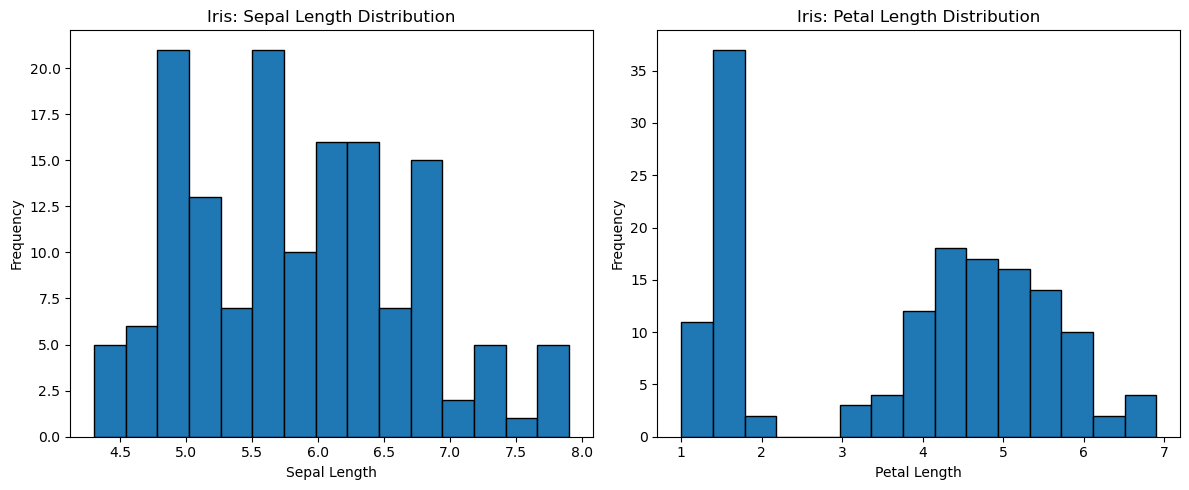

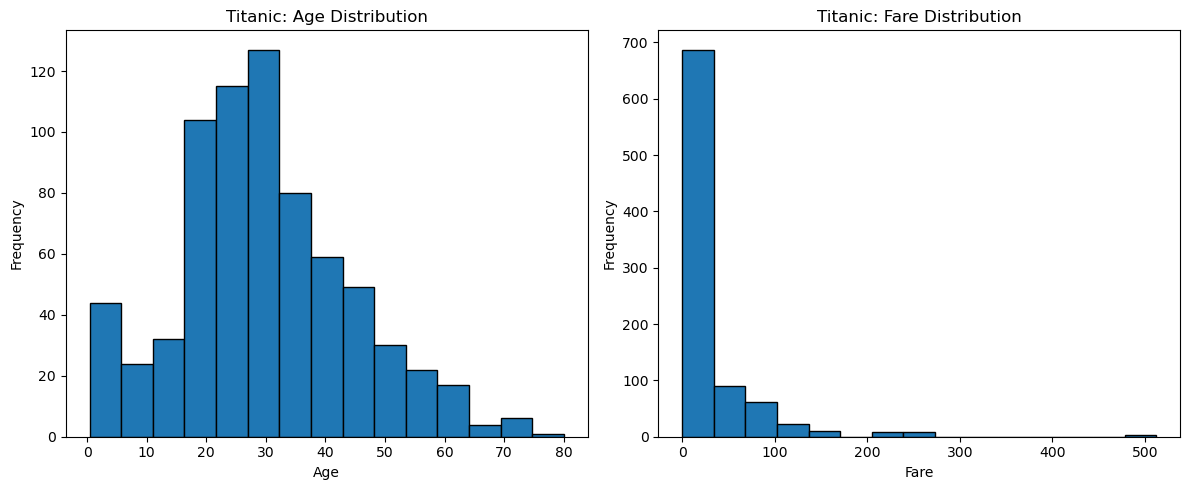

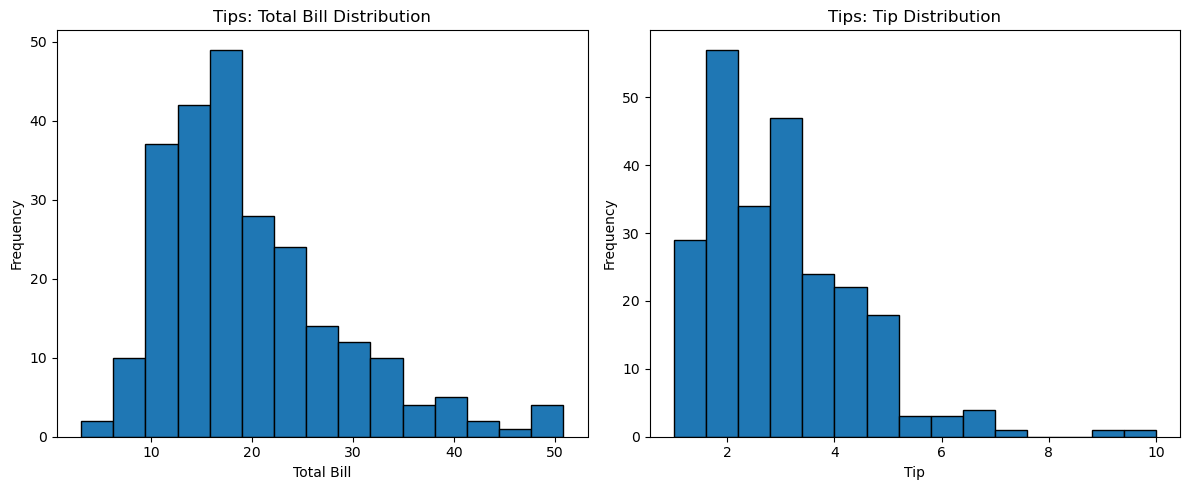

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(iris['sepal_length'], bins=15, edgecolor='black')
plt.title("Iris: Sepal Length Distribution")
plt.xlabel("Sepal Length")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(iris['petal_length'], bins=15, edgecolor='black')
plt.title("Iris: Petal Length Distribution")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(titanic['age'].dropna(), bins=15, edgecolor='black')
plt.title("Titanic: Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(titanic['fare'].dropna(), bins=15, edgecolor='black')
plt.title("Titanic: Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(tips['total_bill'], bins=15, edgecolor='black')
plt.title("Tips: Total Bill Distribution")
plt.xlabel("Total Bill")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(tips['tip'], bins=15, edgecolor='black')
plt.title("Tips: Tip Distribution")
plt.xlabel("Tip")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

task 7

Total Bill quartiles
Q1: 13.3475 Q3: 24.127499999999998 IQR: 10.779999999999998
Tip quartiles
Q1: 2.0 Q3: 3.5625 IQR: 1.5625
Total Bill bounds: -2.8224999999999945 40.29749999999999
Tip bounds: -0.34375 5.90625
Total Bill Outliers:
     total_bill    tip     sex smoker   day    time  size
59        48.27   6.73    Male     No   Sat  Dinner     4
102       44.30   2.50  Female    Yes   Sat  Dinner     3
142       41.19   5.00    Male     No  Thur   Lunch     5
156       48.17   5.00    Male     No   Sun  Dinner     6
170       50.81  10.00    Male    Yes   Sat  Dinner     3
182       45.35   3.50    Male    Yes   Sun  Dinner     3
184       40.55   3.00    Male    Yes   Sun  Dinner     2
197       43.11   5.00  Female    Yes  Thur   Lunch     4
212       48.33   9.00    Male     No   Sat  Dinner     4
Tip Outliers:
     total_bill    tip     sex smoker   day    time  size
23        39.42   7.58    Male     No   Sat  Dinner     4
47        32.40   6.00    Male     No   Sun  Dinner     4


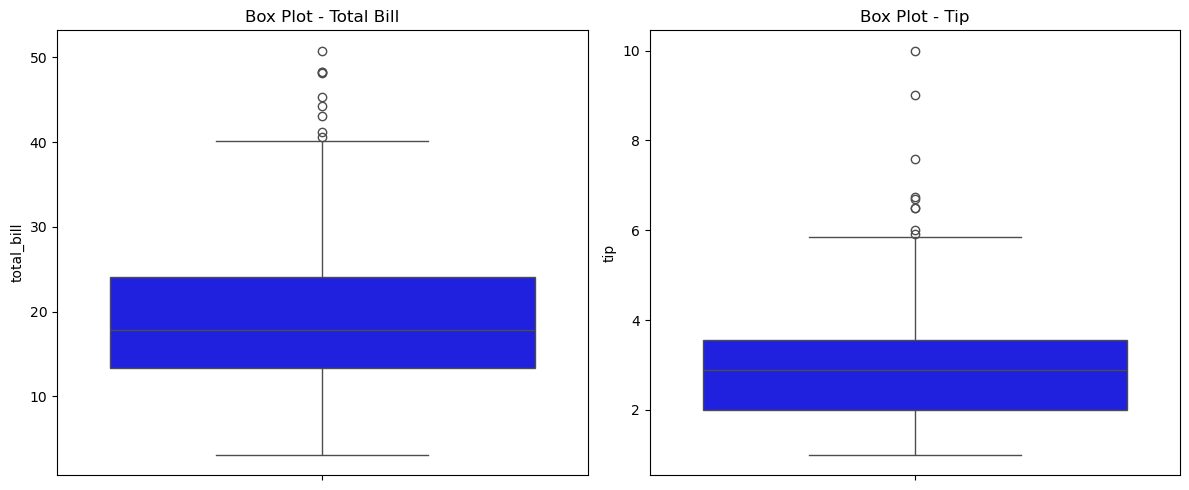

In [36]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

q1_total = tips["total_bill"].quantile(0.25)
q3_total = tips["total_bill"].quantile(0.75)
iqr_total = q3_total - q1_total

q1_tip = tips["tip"].quantile(0.25)
q3_tip = tips["tip"].quantile(0.75)
iqr_tip = q3_tip - q1_tip

print("Total Bill quartiles")
print("Q1:", q1_total, "Q3:", q3_total, "IQR:", iqr_total)
print("Tip quartiles")
print("Q1:", q1_tip, "Q3:", q3_tip, "IQR:", iqr_tip)

lower_total = q1_total - 1.5 * iqr_total
upper_total = q3_total + 1.5 * iqr_total

lower_tip = q1_tip - 1.5 * iqr_tip
upper_tip = q3_tip + 1.5 * iqr_tip

print("Total Bill bounds:", lower_total, upper_total)
print("Tip bounds:", lower_tip, upper_tip)

outliers_total = tips[(tips["total_bill"] < lower_total) | (tips["total_bill"] > upper_total)]

outliers_tip = tips[(tips["tip"] < lower_tip) | (tips["tip"] > upper_tip)]

print("Total Bill Outliers:")
print(outliers_total)

print("Tip Outliers:")
print(outliers_tip)

print("Total Bill Outlier Count:", len(outliers_total))
print("Tip Outlier Count:", len(outliers_tip))

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=tips["total_bill"], color="blue")
plt.title("Box Plot - Total Bill")

plt.subplot(1, 2, 2)
sns.boxplot(y=tips["tip"], color="blue")
plt.title("Box Plot - Tip")

plt.tight_layout()
plt.show()

In [ ]:
task 8

In [38]:
import seaborn as sns
import pandas as pd

tips = sns.load_dataset("tips")

q1_total = tips["total_bill"].quantile(0.25)
q3_total = tips["total_bill"].quantile(0.75)
iqr_total = q3_total - q1_total

q1_tip = tips["tip"].quantile(0.25)
q3_tip = tips["tip"].quantile(0.75)
iqr_tip = q3_tip - q1_tip

lower_total = q1_total - 1.5 * iqr_total
upper_total = q3_total + 1.5 * iqr_total


lower_tip = q1_tip - 1.5 * iqr_tip
upper_tip = q3_tip + 1.5 * iqr_tip

print("Dataset size before cleaning:", tips.shape)

cleaned_tips = tips[
    (tips["total_bill"] >= lower_total) &
    (tips["total_bill"] <= upper_total) &
    (tips["tip"] >= lower_tip) &
    (tips["tip"] <= upper_tip)
]
print("Dataset size after cleaning:", cleaned_tips.shape)

Dataset size before cleaning: (244, 7)
Dataset size after cleaning: (229, 7)


task 9

In [40]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips")

q1_total = tips["total_bill"].quantile(0.25)
q3_total = tips["total_bill"].quantile(0.75)
iqr_total = q3_total - q1_total

q1_tip = tips["tip"].quantile(0.25)
q3_tip = tips["tip"].quantile(0.75)
iqr_tip = q3_tip - q1_tip

lower_total = q1_total - 1.5 * iqr_total
upper_total = q3_total + 1.5 * iqr_total

lower_tip = q1_tip - 1.5 * iqr_tip
upper_tip = q3_tip + 1.5 * iqr_tip

outliers_total = tips[(tips["total_bill"] < lower_total) | (tips["total_bill"] > upper_total)]
outliers_tip = tips[(tips["tip"] < lower_tip) | (tips["tip"] > upper_tip)]

print("Total Bill Outlier Count:", len(outliers_total))
print("Tip Outlier Count:", len(outliers_tip))

print("Dataset size before cleaning:", tips.shape)

cleaned_tips = tips[
    (tips["total_bill"] >= lower_total) &
    (tips["total_bill"] <= upper_total) &
    (tips["tip"] >= lower_tip) &
    (tips["tip"] <= upper_tip)
]

print("Dataset size after cleaning:", cleaned_tips.shape)

before_stats = tips[["total_bill", "tip"]].agg(["mean", "median", "std"])
after_stats = cleaned_tips[["total_bill", "tip"]].agg(["mean", "median", "std"])

comparison = pd.concat([before_stats, after_stats], axis=1, keys=["Before Cleaning", "After Cleaning"])
print(comparison)

Total Bill Outlier Count: 9
Tip Outlier Count: 9
Dataset size before cleaning: (244, 7)
Dataset size after cleaning: (229, 7)
       Before Cleaning           After Cleaning          
            total_bill       tip     total_bill       tip
mean         19.785943  2.998279      18.476856  2.806332
median       17.795000  2.900000      17.260000  2.710000
std           8.902412  1.383638       7.212792  1.085224
